In [1]:
import pandas as pd 
from sklearn.feature_selection import SelectKBest, chi2
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')



import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report 
from sklearn.model_selection import KFold


# single model
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#Ensemble Learning
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve, roc_auc_score

# feature selection

In [2]:
data = pd.read_csv('Data_DropOut(ตกออก, ลาออก).csv', index_col=0)
data.head()

,STATUSTEXT,GPA,ENTRYGPA,STUDENTSEX,FATHERINCOME,YEARFATHER,MOTHERINCOME,YEARMOTHER,บุตรคนที่,จำนวนพี่น้อง,...,COURSE_GRADE_LEARNING SKILLS_F,COURSE_GRADE_LOCAL WISDOM_F,COURSE_GRADE_MEDITATION FOR LIFE DEVELOPMENT_F,COURSE_GRADE_MULTICULTURALISM_F,COURSE_GRADE_OPERATIONS RESEARCH_F,COURSE_GRADE_PHYSICAL EDUCATION ACTIVITY (AEROBIC DANCE)_F,COURSE_GRADE_RISK AND INSURANCE_F,COURSE_GRADE_SMALL AND MEDIUM ENTERPRISES MANAGEMENT_F,COURSE_GRADE_STATISTICAL ANALYSIS I_F,COURSE_GRADE_STATISTICAL MODEL_F
0,1,1.21,3.26,0,100000.0,44.0,100000.0,45.0,1.0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,2.60,3.38,0,10000.0,43.0,9000.0,37.0,1.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,2.44,3.82,0,30000.0,49.0,30000.0,48.0,3.0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,2.29,3.16,0,53080.0,59.0,47660.0,54.0,3.0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,3.23,3.56,0,27000.0,58.0,10000.0,50.0,2.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data.dropna(inplace=True)

In [4]:
data.shape

(555, 49)

In [5]:
data.rename(columns={"บุตรคนที่": "NumberOfSon", "จำนวนพี่น้อง": "NumberOfSiblings"}, inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555 entries, 0 to 555
Data columns (total 49 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   STATUSTEXT                                                               555 non-null    int64  
 1   GPA                                                                      555 non-null    float64
 2   ENTRYGPA                                                                 555 non-null    float64
 3   STUDENTSEX                                                               555 non-null    int64  
 4   FATHERINCOME                                                             555 non-null    float64
 5   YEARFATHER                                                               555 non-null    float64
 6   MOTHERINCOME                                                             5

In [7]:
X = data.drop('STATUSTEXT' , axis = 1)
y = data['STATUSTEXT']

# oversampling

In [8]:
print(Counter(y))

Counter({0: 469, 1: 86})


In [9]:
oversample = RandomOverSampler(sampling_strategy='minority')

In [10]:
X_over, y_over = oversample.fit_resample(X, y)

In [11]:
print(Counter(y_over))

Counter({1: 469, 0: 469})


# scaling

In [12]:
scaler = MinMaxScaler()

In [13]:
#X[np.array(X.columns)] = scaler.fit_transform(X)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y , random_state = 123)


In [14]:
X_over[np.array(X_over.columns)] = scaler.fit_transform(X_over)

# train test

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.20, stratify=y_over , random_state = 123)


# single model

In [16]:
rt = RandomForestClassifier(random_state=123)
dt = DecisionTreeClassifier(random_state=123)
svm = SVC(probability=True,random_state=123)

In [17]:
# turning model
# parameter model 

param_grid_svm = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}



param_grid_rt = {'max_depth': [3, 5, 10, 20, 30],
                 'criterion' :['gini', 'entropy'],
                 'max_features': ['auto', 'sqrt', 'log2'],
                 'min_samples_split': [2, 5, 10]}



param_grid_dt = {"max_depth": np.random.randint(1, (len(data.columns)*.85),20),
          "max_features": np.random.randint(1, len(data.columns),20),
          "min_samples_leaf": [2,3,4,5,6],
          "criterion": ["gini", "entropy"]
          }

# K-fold
cv = KFold(n_splits=5, shuffle=True, random_state=1)

# optimize paremeter
clf_1 = GridSearchCV(rt,param_grid_rt, cv=cv , refit=True )
clf_2 = GridSearchCV(dt,param_grid_dt , cv=cv , refit=True)
clf_3 = GridSearchCV(svm,param_grid_svm , cv=cv , refit=True)

## DecisionTreeClassifier

In [18]:
clf_2.fit(X_train , y_train)
y_pred_acc = clf_2.predict(X_test)
print('Best parameters' ,clf_2.best_params_)
print(confusion_matrix(y_test,y_pred_acc))
print(classification_report(y_test,y_pred_acc))
print('-----------------------------------------------------')

Best parameters {'criterion': 'gini', 'max_depth': 10, 'max_features': 33, 'min_samples_leaf': 2}
[[88  6]
 [ 0 94]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        94
           1       0.94      1.00      0.97        94

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188

-----------------------------------------------------


In [19]:
pred_prob2 = clf_2.predict_proba(X_test)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
auc_clf_2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_clf_2

0.9677455862381168

## SVM

In [20]:
clf_3.fit(X_train , y_train)
y_pred_acc = clf_3.predict(X_test)
print('Best parameters' ,clf_3.best_params_)
print(confusion_matrix(y_test,y_pred_acc))
print(classification_report(y_test,y_pred_acc))
print('-----------------------------------------------------')

Best parameters {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
[[85  9]
 [15 79]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88        94
           1       0.90      0.84      0.87        94

    accuracy                           0.87       188
   macro avg       0.87      0.87      0.87       188
weighted avg       0.87      0.87      0.87       188

-----------------------------------------------------


In [21]:
pred_prob3 = clf_3.predict_proba(X_test )
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
auc_clf_3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_clf_3

0.9365097329108193

## ROC single model

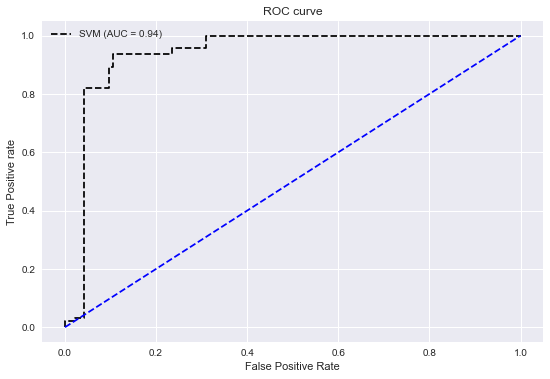

In [22]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

plt.style.use('seaborn')

# plot roc curves
#plt.plot(fpr1, tpr1, linestyle='--',color='black', label='RT (AUC = %0.2f)' % auc_clf_1)
#plt.plot(fpr2, tpr2, linestyle='--',color='green', label='DT (AUC = %0.2f)' % auc_clf_2)
plt.plot(fpr3, tpr3, linestyle='--',color='black', label='SVM (AUC = %0.2f)' % auc_clf_3)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

# Ensemble Model

## Bagging

### Bagging (DT base model)

In [23]:
n_estimators = [10, 100, 1000]
grid = dict(n_estimators=n_estimators)

In [24]:
clf_bagging1 = BaggingClassifier(base_estimator=clf_2.best_estimator_, n_estimators=10, oob_score=True ,random_state=123)
clf_bagging1.fit(X_train, y_train)
y_pred_acc = clf_bagging1.predict(X_test)
print(confusion_matrix(y_test,y_pred_acc))
print(classification_report(y_test,y_pred_acc))
print('-----------------------------------------------------')

[[90  4]
 [ 2 92]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        94
           1       0.96      0.98      0.97        94

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188

-----------------------------------------------------


In [25]:
pred_prob4 = clf_bagging1.predict_proba(X_test)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
auc_clf_bagging1 = roc_auc_score(y_test, pred_prob4[:,1])
auc_clf_bagging1

0.9921910366681757

### Bagging (SVM base model)

In [26]:
clf_bagging2 = BaggingClassifier(base_estimator=clf_3.best_estimator_, n_estimators=10, oob_score=True,random_state=123)
clf_bagging2.fit(X_train, y_train)
y_pred_acc = clf_bagging2.predict(X_test)

print(confusion_matrix(y_test,y_pred_acc))
print(classification_report(y_test,y_pred_acc))
print('-----------------------------------------------------')

[[86  8]
 [13 81]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89        94
           1       0.91      0.86      0.89        94

    accuracy                           0.89       188
   macro avg       0.89      0.89      0.89       188
weighted avg       0.89      0.89      0.89       188

-----------------------------------------------------


In [27]:
pred_prob5 = clf_bagging2.predict_proba(X_test)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)
auc_clf_bagging2 = roc_auc_score(y_test, pred_prob5[:,1])
auc_clf_bagging2

0.9557492077863287

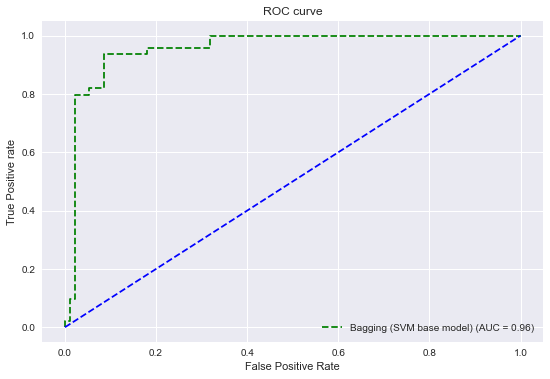

In [28]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

plt.style.use('seaborn')

# plot roc curves
#plt.plot(fpr4, tpr4, linestyle='--',color='orange', label='Bagging (DT base model) (AUC = %0.2f)' % auc_clf_bagging1)
plt.plot(fpr5, tpr5, linestyle='--',color='green', label='Bagging (SVM base model) (AUC = %0.2f)' % auc_clf_bagging2)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

## Boosting

### Boosting (DT base model)

In [29]:
model= AdaBoostClassifier(base_estimator= clf_2.best_estimator_ , algorithm="SAMME" ,random_state=999)
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(X_train, y_train)

y_pred_acc = grid_result.predict(X_test)


In [30]:
print('Best parameters' ,grid_result.best_params_)
print(confusion_matrix(y_test,y_pred_acc))
print(classification_report(y_test,y_pred_acc))
print('-----------------------------------------------------')

Best parameters {'learning_rate': 1.0, 'n_estimators': 100}
[[93  1]
 [ 0 94]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        94
           1       0.99      1.00      0.99        94

    accuracy                           0.99       188
   macro avg       0.99      0.99      0.99       188
weighted avg       0.99      0.99      0.99       188

-----------------------------------------------------


In [31]:
pred_prob6 = grid_result.predict_proba(X_test)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)
auc_clf_boosting1 = roc_auc_score(y_test, pred_prob5[:,1])
auc_clf_boosting1

0.9557492077863287

In [32]:
grid_search.best_estimator_.feature_importances_

array([3.22367504e-01, 8.90974211e-02, 2.99596885e-02, 1.55257472e-01,
       8.16905078e-02, 1.34439356e-01, 6.27036413e-02, 1.02319837e-02,
       2.93123148e-02, 4.18275995e-04, 1.27992893e-05, 6.99756772e-04,
       1.02899365e-02, 1.94417826e-05, 4.60200614e-02, 3.70256731e-05,
       1.76329452e-17, 2.31586140e-16, 1.43304124e-18, 3.01384843e-13,
       9.58490646e-06, 2.14088165e-04, 3.12640076e-10, 3.69143401e-22,
       1.08791621e-09, 3.96974125e-08, 1.11814069e-05, 7.68639509e-06,
       1.92878051e-08, 5.40660863e-05, 4.76789344e-15, 1.76307488e-05,
       1.15874016e-02, 1.08905499e-03, 3.38668435e-03, 1.42257904e-14,
       5.21367817e-06, 1.80863779e-14, 9.25968399e-03, 1.43826464e-07,
       5.63688938e-11, 1.44453615e-10, 2.49267893e-04, 7.28629462e-19,
       5.71639435e-11, 7.19044139e-07, 1.55034616e-03, 1.41382374e-10])

### Boosting (SVM base model)

In [33]:
model1 = AdaBoostClassifier(base_estimator= clf_3.best_estimator_ , algorithm="SAMME" ,random_state=123)
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid_search = GridSearchCV(estimator=model1, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(X_train, y_train)
y_pred_acc = grid_result.predict(X_test)


In [34]:
print('Best parameters' ,grid_result.best_params_)
print(confusion_matrix(y_test,y_pred_acc))
print(classification_report(y_test,y_pred_acc))
print('-----------------------------------------------------')

Best parameters {'learning_rate': 1.0, 'n_estimators': 50}
[[81 13]
 [10 84]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        94
           1       0.87      0.89      0.88        94

    accuracy                           0.88       188
   macro avg       0.88      0.88      0.88       188
weighted avg       0.88      0.88      0.88       188

-----------------------------------------------------


In [35]:
pred_prob7 = grid_result.predict_proba(X_test)
fpr7, tpr7, thresh7 = roc_curve(y_test, pred_prob7[:,1], pos_label=1)
auc_clf_boosting2 = roc_auc_score(y_test, pred_prob7[:,1])
auc_clf_boosting2

0.9503734721593481

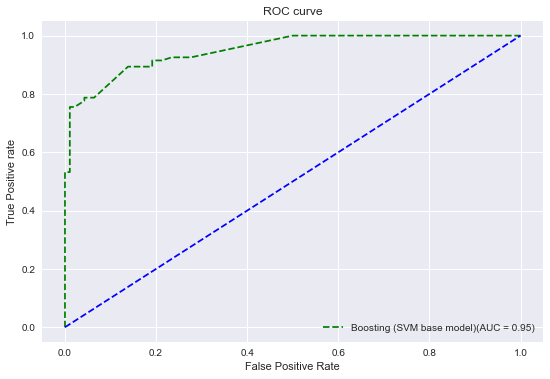

In [36]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

plt.style.use('seaborn')

# plot roc curves
#plt.plot(fpr6, tpr6, linestyle='--',color='orange', label='Boosting (DT base model) (AUC = %0.2f)' % auc_clf_boosting1)
plt.plot(fpr7, tpr7, linestyle='--',color='green', label='Boosting (SVM base model)(AUC = %0.2f)' % auc_clf_boosting2)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

## RandomForestClassifier

In [37]:
rt = RandomForestClassifier(random_state=121)
clf_1 = GridSearchCV(rt,param_grid_rt, cv=cv , refit=True )
clf_1.fit(X_train , y_train)
y_pred_acc = clf_1.predict(X_test)
print('Best parameters' ,clf_1.best_params_)
print(confusion_matrix(y_test,y_pred_acc))
print(classification_report(y_test,y_pred_acc))
print('-----------------------------------------------------')

Best parameters {'criterion': 'entropy', 'max_depth': 30, 'max_features': 'auto', 'min_samples_split': 2}
[[93  1]
 [ 0 94]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        94
           1       0.99      1.00      0.99        94

    accuracy                           0.99       188
   macro avg       0.99      0.99      0.99       188
weighted avg       0.99      0.99      0.99       188

-----------------------------------------------------


In [38]:
pred_prob1 = clf_1.predict_proba(X_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
auc_clf_1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_clf_1



0.9997736532367587

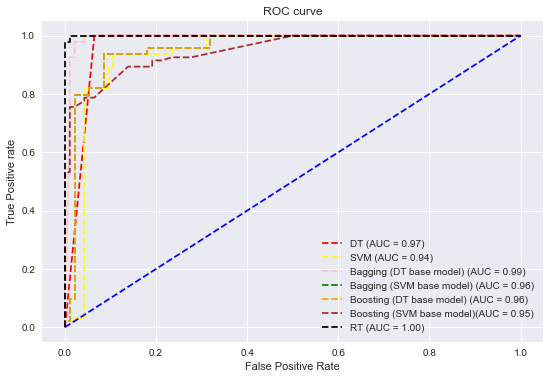

In [39]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='DT (AUC = %0.2f)' % auc_clf_2)
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='SVM (AUC = %0.2f)' % auc_clf_3)
plt.plot(fpr4, tpr4, linestyle='--',color='pink', label='Bagging (DT base model) (AUC = %0.2f)' % auc_clf_bagging1)
plt.plot(fpr5, tpr5, linestyle='--',color='green', label='Bagging (SVM base model) (AUC = %0.2f)' % auc_clf_bagging2)
plt.plot(fpr6, tpr6, linestyle='--',color='orange', label='Boosting (DT base model) (AUC = %0.2f)' % auc_clf_boosting1)
plt.plot(fpr7, tpr7, linestyle='--',color='brown', label='Boosting (SVM base model)(AUC = %0.2f)' % auc_clf_boosting2)
plt.plot(fpr1, tpr1, linestyle='--',color='black', label='RT (AUC = %0.2f)' % auc_clf_1)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [40]:
clf_1.best_estimator_.feature_importances_

array([3.77854630e-01, 8.47860775e-02, 1.46573488e-02, 7.45405317e-02,
       5.62462130e-02, 7.07409676e-02, 5.58870274e-02, 1.58067025e-02,
       1.77647918e-02, 2.73326696e-03, 5.48759422e-03, 1.43062064e-02,
       1.93540960e-02, 2.53432627e-03, 7.40422241e-03, 2.34088989e-03,
       7.18944687e-03, 5.55395411e-04, 3.30725231e-04, 3.03710401e-04,
       2.23670645e-03, 2.17126376e-02, 6.80542736e-04, 1.82052324e-03,
       4.15097179e-04, 7.71798103e-04, 1.53300020e-03, 7.32517452e-03,
       1.15841816e-03, 7.57141644e-03, 1.12576207e-03, 9.05550394e-03,
       1.78190711e-02, 9.22374732e-03, 1.36601483e-02, 3.60086967e-03,
       8.02932586e-03, 5.04540779e-04, 8.09604610e-03, 3.86361737e-03,
       3.99772182e-04, 2.99022559e-03, 4.45938747e-03, 1.53943242e-03,
       9.15021552e-04, 8.50195816e-04, 3.60533268e-02, 1.76452038e-03])

In [41]:
forest_importances = pd.Series(clf_1.best_estimator_.feature_importances_, index=X_train.columns)
forest_importances.sort_values(ascending=False)

GPA                                                                        0.377855
ENTRYGPA                                                                   0.084786
FATHERINCOME                                                               0.074541
MOTHERINCOME                                                               0.070741
YEARFATHER                                                                 0.056246
YEARMOTHER                                                                 0.055887
COURSE_GRADE_STATISTICAL ANALYSIS I_F                                      0.036053
COURSE_GRADE_ELEMENTARY PHYSICS_F                                          0.021713
COURSE_GRADE_CALCULUS  FOR PHYSICAL SCIENCE II_F                           0.019354
COURSE_GRADE_GENERAL CHEMISTRY LABORATORY_F                                0.017819
NumberOfSiblings                                                           0.017765
NumberOfSon                                                                0

<AxesSubplot:>

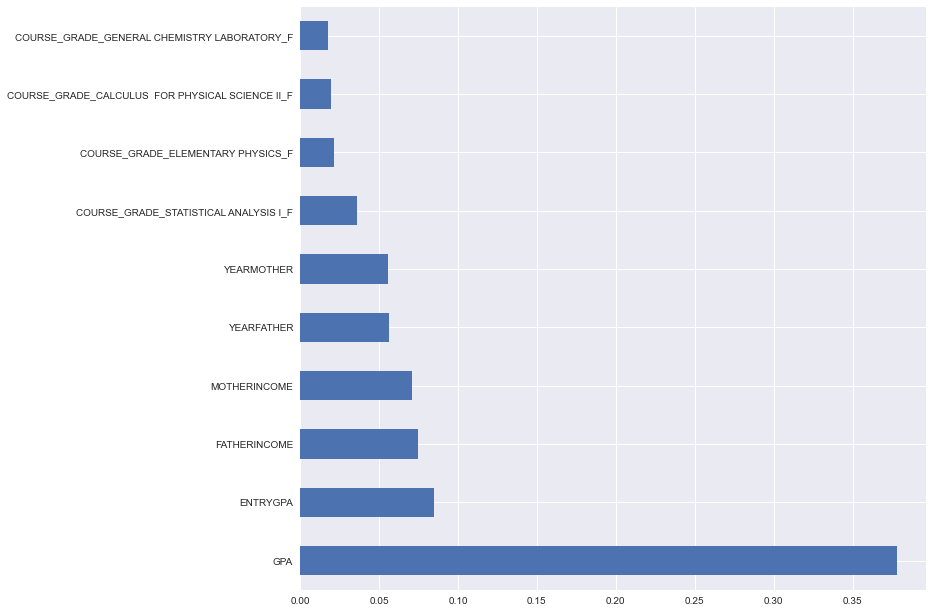

In [42]:
plt.subplots(figsize=(10,10))
forest_importances.sort_values(ascending=False).nlargest(10).plot.barh()

In [43]:
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py

In [44]:
data_fea = forest_importances[forest_importances.values > 0.01]
data_fea=data_fea.rename('Coefficient').reset_index().sort_values('Coefficient', ascending=False)
data_fea.to_csv(r'Feature importance case 3.csv' , encoding='utf-8-sig')
data_fea['index']

0                                                  GPA
1                                             ENTRYGPA
3                                         FATHERINCOME
5                                         MOTHERINCOME
4                                           YEARFATHER
6                                           YEARMOTHER
14               COURSE_GRADE_STATISTICAL ANALYSIS I_F
11                   COURSE_GRADE_ELEMENTARY PHYSICS_F
10    COURSE_GRADE_CALCULUS  FOR PHYSICAL SCIENCE II_F
12         COURSE_GRADE_GENERAL CHEMISTRY LABORATORY_F
8                                     NumberOfSiblings
7                                          NumberOfSon
2                                           STUDENTSEX
9          COURSE_GRADE_BIOLOGY FOR PHYSICAL SCIENCE_F
13         COURSE_GRADE_GENERAL PHYSICS LABORATORY I_F
Name: index, dtype: object

In [47]:
data_asd = pd.DataFrame(data_fea['index'].str.split('_', n=2,expand=True ))
data_asd[data_asd[0] != 'COURSE'][0].values

indices = data_asd[data_asd[0] != 'COURSE'][0].index
data_asd.loc[indices, 2] = data_asd[data_asd[0] != 'COURSE'][0].values

data_fea['Feature'] = data_asd[2]
data_fea

,index,Coefficient,Feature
0,GPA,0.377855,GPA
1,ENTRYGPA,0.084786,ENTRYGPA
3,FATHERINCOME,0.074541,FATHERINCOME
5,MOTHERINCOME,0.070741,MOTHERINCOME
4,YEARFATHER,0.056246,YEARFATHER
...,...,...,...
8,NumberOfSiblings,0.017765,NumberOfSiblings
7,NumberOfSon,0.015807,NumberOfSon
2,STUDENTSEX,0.014657,STUDENTSEX
9,COURSE_GRADE_BIOLOGY FOR PHYSICAL SCIENCE_F,0.014306,BIOLOGY FOR PHYSICAL SCIENCE_F


In [48]:
fig = px.bar(data_fea, x='Coefficient', y='Feature', text='Coefficient',  
             barmode='group', opacity=0.75)
fig.update_traces(texttemplate='%{text:,.3f}', textposition='outside',
                  marker_line=dict(width=1, color='#28221D'))
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='#28221D')

fig.update_layout(title_text='feature importance (ตกออก, ลาออก)', font_color='#28221D',
                  yaxis_title='Feature')
fig.show()

In [46]:
data_2564 = pd.read_csv('Data_2564_DropOut(ตกออก, ลาออก).csv', index_col=0)
data_2564.rename(columns={"บุตรคนที่": "NumberOfSon", "จำนวนพี่น้อง": "NumberOfSiblings"}, inplace=True)

data_2564.head()

,STATUSTEXT,GPA,ENTRYGPA,STUDENTSEX,FATHERINCOME,YEARFATHER,MOTHERINCOME,YEARMOTHER,NumberOfSon,NumberOfSiblings,...,COURSE_GRADE_LEARNING SKILLS_F,COURSE_GRADE_LOCAL WISDOM_F,COURSE_GRADE_MEDITATION FOR LIFE DEVELOPMENT_F,COURSE_GRADE_MULTICULTURALISM_F,COURSE_GRADE_OPERATIONS RESEARCH_F,COURSE_GRADE_PHYSICAL EDUCATION ACTIVITY (AEROBIC DANCE)_F,COURSE_GRADE_RISK AND INSURANCE_F,COURSE_GRADE_SMALL AND MEDIUM ENTERPRISES MANAGEMENT_F,COURSE_GRADE_STATISTICAL ANALYSIS I_F,COURSE_GRADE_STATISTICAL MODEL_F
556,0,2.63,3.62,0,45000.0,52.0,14000.0,52.0,1.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
557,0,1.95,3.23,0,3000.0,55.0,9000.0,54.0,2.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
558,0,2.45,3.05,0,40000.0,51.0,40000.0,49.0,2.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
559,0,1.97,3.00,0,37210.0,46.0,22980.0,49.0,1.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
560,0,3.24,3.50,0,15000.0,43.0,15000.0,43.0,2.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
data_2564.drop('STATUSTEXT',1,inplace=True)

In [48]:
data_2564.shape

(103, 52)

In [49]:
y_pred_acc = clf_1.predict(data_2564)
#print('Best parameters' ,clf_1.best_params_)
#print(confusion_matrix(y_test,y_pred_acc))
#print(classification_report(y_test,y_pred_acc))
#print('-----------------------------------------------------')

In [50]:
y_pred_acc

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [51]:
y_pred_case3 = pd.DataFrame(y_pred_acc)
y_pred_case3.to_csv(r'y_pred_case3.csv', encoding='utf-8-sig')